# Quanvolutional Neural Networks for Image Classification

*Marja Wahl, CSC 586A Grad Project Quantum Algorithms 2024, supervised by Prof. Hausi Müller*

<!---
new typesetting commands for easier braket notation
-->
$$\newcommand{\ket}[1]{\left|{#1}\right\rangle}$$
$$\newcommand{\bra}[1]{\left\langle{#1}\right|}$$
$$\newcommand{\braket}[2]{\left\langle{#1}\middle|{#2}\right\rangle}$$

# Problem Specification

<div>
<img src="https://images.datacamp.com/image/upload/v1663850409/Binary_classification_task_ec3247c7d2.png" width="500" height="300"/>
</div>

Image classification describes the task of analyzing an image and predicting a certain label based on the analysis results. For example, an image of a handwritten digit can function as input, and the algorithm tries to correctly assign one of the 10 digits.

## How do we represent an image?

In [37]:
from tensorflow import keras

mnist_dataset = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist_dataset.load_data()

train_images[0].shape  # get one to show dimensions

(28, 28)

The image is represented as a 2-dimensional array of pixel values. Each pixel value corresponds to a specific color, depending on the encoding. For the MNIST dataset, this is set to values from 0 to 255 on a gray scale. 

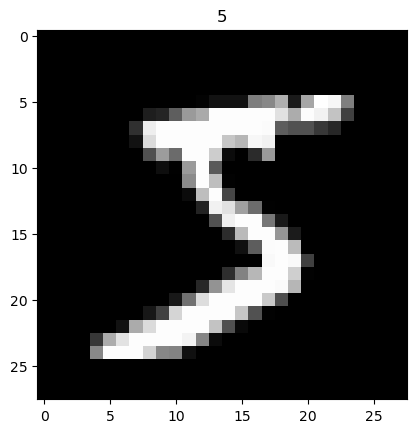

In [3]:
import matplotlib.pyplot as plt

plt.imshow(train_images[0], cmap=plt.get_cmap('gray'))
plt.title(str(train_labels[0]))

plt.show()

# Learning on Image Data with CNNs

Convolutional neural networks (CNN) are popular models in the field of image and video recognition. They excel at recognizing hierarchical features in images, because of the many filters that are applied to the input. Each filter is trained individually and able to focus on independent elements of an image. For example, [Lecun et al.](https://ieeexplore.ieee.org/abstract/document/726791?casa_token=5JSfq9YtiwMAAAAA:Cq5CgHZw8afNnMo_FCjHYhETpyKrGujFfKAdMw01bGTHwsMLmEt-JMJj-k0e0BdNF0VoKJITxA) were one of the first to apply CNNs on the [MNIST](https://git-disl.github.io/GTDLBench/datasets/mnist_datasets/) dataset, where they classified hand-written digits. 

## Architecture

<div>
<img src="https://saturncloud.io/images/blog/a-cnn-sequence-to-classify-handwritten-digits.webp" width="600" height="300"/>
</div>

### Convolution Layer 

The [classical CNN](https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53) is a [neural network](https://towardsdatascience.com/machine-learning-for-beginners-an-introduction-to-neural-networks-d49f22d238f9) architecture, which is adapted to work with image data as input. The main difference to a classic neural netowrk is the added **convolution layer**. This layer processes the input, the pixels of an image, by convoluting it with a specific kernel function, which is moved over the image data with a predefined stride. Convoluting means performing element-wise matrix multiplication between target area and kernel matrix. The weights of the kernel functions are learned and updated in each training step.

![convolution](https://saturncloud.io/images/blog/convoluting-a-5x5x1-image-with-a-3x3x1-kernel-to-get-a-3x3x1-convolved-feature.gif)

The number $n$ of kernels is a hyperparameter, deciding how many different local patterns can be learned. In order to avoid learning the same $n$ patterns, the creation of the kernel functions is randomized. This process makes it possible for the network to identify local features, as well as handle the amount of pixels that exist in large images.

### Pooling Layer

Usually, after each convolutional layer, a pooling layer is implemented. This layer is structured similarly to a convolution layer, but instead of a trainable kernel matrix, a pooling function is applied on the target area. Typical functions are max or mean. The layer is added to additionally reduce the dimensions of the input.

### Fully-connected Layer

Finally, after convolving and reducing the input data to a reasonable size, the data is flattened and input to a fully-connected neural network layer. Depending on the task that is performed with the CNN, an activation is chosen. For example, for classification, we can use a softmax activation function, which assigns a probability distribution to our output nodes.

For more details about CNNs you can look at this [website](https://saturncloud.io/blog/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way/).

## Applications

The CNN is used for a long list of tasks, including image classification, object detection, facial recognition, and image segmentation. These tasks are essential for applications like automated driving or medical image analysis. Aside from ethical concerns, the main issue with self-driving cars is the vehicles ability to identify moving objects correctly. The accuracy of the CNN used for this task is therefore crucial in the success of the automated vehicle. In the medical field, CNNs can be used to analyze X-rays, MRIs, or CT scans. They are able to identify tumors or fractures, can segment images according to tissues and different structures, or improve the quality of medical images.

CNNs can also be used in Natural Language Processing (NLP) or Signal Processing. NLP tasks that can be solved by using CNNs are text classification and sentiment analysis, by converting text into image-like representations. CNNs can also be used to process signals like audio, radar, and sonar data.

Overall, CNNs have a great variety of applications. Improving the achievable accuracy and performance is of major importance for the advance of artificial intelligence. Therefore, I find it most interesting how quantum computing can be used to leverage the performance of such models. 
 

# What is a Quanvolutional Neural Network?

Quantum Convolutional Networks, or Quanvolutional Neural Networks (QNNs), were first introduced by [Henderson et al. (2019)](https://arxiv.org/abs/1904.04767). They combine the idea of convolution with quantum computing, resulting in a novel quantum convolution layer. 

A QNN is a CNN with added quanvolutional layers. The **quanvolutional layers** proposed by [Henderson et al.](https://arxiv.org/abs/1904.04767) work similar to convolutional layers, but instead of $n$ kernel functions, they use $N$ quantum filters. The quantum filters are applied on local areas of the image like their classical counterparts, but are implemented using random quantum circuits. 

The authors hypothesize that the random quanvolutional circuits increase the accuracy of the machine learning models for classification purposes, as they are able to efficiently model high dimensional kernel functions and complex functional relationships, as pointed out by [Mitari et al.](https://journals.aps.org/pra/abstract/10.1103/PhysRevA.98.032309). The quantum circuit may be able to generate kernels that are too complicated for classical convolution. 

<div>
<img src="imgs/qnn_architecture.png" width="600" height="300"/>
</div>

The quanvolutional layer is portrayed in the figure above. In this example, a 2x2 square of the image input is embedded into a quantum circuit. The authors use a $3x3$ quanvolutional filter in their experiment. The input values are encoded by applying parametrized rotations to the qubits. For determining their initial state, the authors set the qubits to $\ket{1}$, if the input value is above a certain threshold, in this case 0. Otherwise, the state is set to $\ket{0}$. As a next step, a random quantum gate $U$ is applied. Finally, each qubit is measured and the result is decoded. The paper implements post-processing by summing all measured classical ones to a scalar value. 

The random quantum circuit is implemented by viewing each qubit as a node in a graph and assigning a connection probability between each qubit. This probability is then used as the likelihood of applying a 2-qubit gate from the set of CNot, Swap, SqrtSwap, or ControlledU gate. If a 2-qubit gate is applied, it is randomly picked. In any case, a 1-qubit gate is applied to each of the qubits, randomly selected from the gate set $[X(\theta), Y(\theta), Z(\theta), U(\theta), P, T, H]$. $\theta$ is chosen randomly as well. After all gates are set, the order of applying them is randomized. 

The advantages of this approach are that the number of quantum bits needed are small, with shallow gate depths. Also, the quanvolutions are resilient to error, as long as the error is consistent. This results from the fact that the quantum circuits are supposed to be random, where a consistent error can be seen as a random factor. Also, the data is not needed to be stored into QRAM, since it is input to the circuits during runtime. 

## Experiment on MNIST Data

In order to verify if QNNs provide a quantum advantage, the authors performed an experiment on the MNIST dataset. This dataset consists of 60,000 train and 10,000 test images of handwritten digits. The input dimensions of the single images are 28x28. 

The three models that were trained and then tested on the test dataset were a CNN model, QNN model, and a RANDOM model. The QNN model used a single quanvolutional layer as first layer, whereas the rest of the architecture stayed the same compared to the CNN. The RANDOM model used a purely classical random non-linear transformation instead of the quanvolutional layer of the QNN. The experiment was performed on the QxBranch Quantum Computer Simulation System. 

<div>
<img src="imgs/qnn_results.png" width="300" height="300"/>
</div>

As a result, the CNN is outperformed by both of the other models. Yet, the QNN is not able to outperform the purely classical RANDOM model. This implies that the quantum advantage is not fully achieved yet, since the non-linear transformations introduced by the quantum filters can also be introduced classically. 

# Findings and Challenges

The QNN does not achieve quantum advantage over a purely classical solution. Another limitation is that, if the quanvolutional filters are positioned after layers with trainable parameters, $N$ quantum transformations have to occur every training step per layer. 

Overall, the QNN approach enables many interesting future research questions. For example, it is unclear how the specific encoding and decoding mechanisms influence the performance of the model. Also, it would be interesting to know if a specific gate set for the random circuit creation works better on certain datasets. Additionally, specifically crafted quantum circuits for each filter could be compared to the random filter approach. It would be helpful to know which properties are classically difficult to simulate, and then use QNNs for these cases, to gain quantum advantage. 

Further experiments were conducted after the publishing of the QNN paper by Henderson et al. For example, [Houssein et al.](https://academic.oup.com/jcde/article/9/2/343/6537164) implement a quantum-classical convolution pipeline for COVID-19 prediction in 2022. The authors use the quanvolutional layer proposed by Henderson et al. for preprocessing the image data of chest X-ray images to predict whether a patient has COVID-19. It is able to outperform the classical model in some cases, performing binary classification.

Using machine learning for aiding health care experts in their decisions is what interests me the most about the field. I am curious to see how the marriage of quantum computing and classical machine learning can improve our state of the art model performances. Improving accuracy and runtime are both significant ways of accessing faster and more precise health care. 

# Implementation

Implementation from the [Pennylane.ai](https://pennylane.ai/qml/demos/tutorial_quanvolution/#classical-convolution) website. It requires *PennyLane* with the *TensorFlow* interface and the plotting library *matplotlib*.

<div>
<img src="https://pennylane.ai/_images/circuit3.png" width="400" height="200"/>
</div>

The structure of the model implemented in this section can be seen in the figure above. In the code example, the raw expectation values are used, what results in a multiple channel representation of the input image. 

In [5]:
import pennylane as qml
from pennylane import numpy as np
from pennylane.templates import RandomLayers
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

## Prepare dataset

Set the hyper-parameters for the training of the main CNN model

In [26]:
n_epochs = 30  # Number of optimization epochs
n_layers = 1  # Number of random layers
runs = 5  # Number of runs for training

n_train = 1000  # Size of the train dataset
n_test = 100  # Size of the test dataset

SAVE_PATH = "./assets/"  # Data saving folder
PREPROCESS = True  # If False, skip quantum processing and load data from SAVE_PATH
np.random.seed(0)  # Seed for NumPy random number generator
tf.random.set_seed(0)  # Seed for TensorFlow random number generator

The dataset that we will test the QNN on is the MNIST dataset. It is a dataset consisting of images of handwritten digits. For performance reasons, we will only use a subset of the data.

In [8]:
mnist_dataset = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist_dataset.load_data()

# Reduce dataset size
train_images = train_images[:n_train]
train_labels = train_labels[:n_train]
test_images = test_images[:n_test]
test_labels = test_labels[:n_test]

We can look at one of the training images. Each image is represented by a 28x28 numpy array, with values from 0 to 255, each value representing a value on the gray scale

In [9]:
# summarize loaded dataset
print('Train: X=%s, y=%s' % (train_images.shape, train_labels.shape))
print('Test: X=%s, y=%s' % (test_images.shape, test_labels.shape))

Train: X=(1000, 28, 28), y=(1000,)
Test: X=(100, 28, 28), y=(100,)


We can plot the first 9 images in our training dataset and add their labels as the plots titles

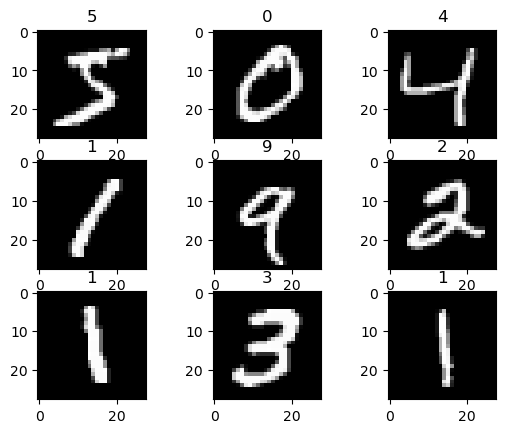

In [10]:
for i in range(9):
    # define subplot
    plt.subplot(330 + 1 + i)
    # plot raw pixel data
    plt.imshow(train_images[i], cmap=plt.get_cmap('gray'))
    plt.title(str(train_labels[i]))
# show the figure
plt.show()

Normalization is used in Machine Learning to transform features to be on a similar scale. This improves the performance and training stability of the model.

In [11]:
# Normalize pixel values within 0 and 1
train_images = train_images / 255
test_images = test_images / 255

In [12]:
# Add extra dimension for convolution channels
train_images = np.array(train_images[..., tf.newaxis], requires_grad=False)
test_images = np.array(test_images[..., tf.newaxis], requires_grad=False)

print('Train: X=%s, y=%s' % (train_images.shape, train_labels.shape))
print('Test: X=%s, y=%s' % (test_images.shape, test_labels.shape))

Train: X=(1000, 28, 28, 1), y=(1000,)
Test: X=(100, 28, 28, 1), y=(100,)


## Quantum circuit as a convolution kernel

We create quantum circuits acting as 2x2 convolution kernels. We encode the classical input values in form of $R_y$ gates with angles scaled by factor of $\pi$, and implement the random quantum circuit with the ``RandomLayers`` class, which creates layers of randomly chosen single qubit rotations and 2-qubit entangling gates, acting on randomly chosen qubits, and random weights ``rand_params``

In [13]:
dev = qml.device("default.qubit", wires=4)
# Random circuit parameters
rand_params = np.random.uniform(high=2 * np.pi, size=(n_layers, 4))

@qml.qnode(dev)
def circuit(phi):
    # Encoding of 4 classical input values
    for j in range(4):
        qml.RY(np.pi * phi[j], wires=j)

    # Random quantum circuit
    RandomLayers(rand_params, wires=list(range(4)))

    # Measurement producing 4 classical output values
    return [qml.expval(qml.PauliZ(j)) for j in range(4)]

drawer = qml.draw(circuit, decimals=2, show_all_wires=True)
print(drawer([np.pi * 1, np.pi * 0.5, np.pi * 2, np.pi * 3]))  # circuit for example input

0: ──RY(9.87)──╭RandomLayers(M0)─┤  <Z>
1: ──RY(4.93)──├RandomLayers(M0)─┤  <Z>
2: ──RY(19.74)─├RandomLayers(M0)─┤  <Z>
3: ──RY(29.61)─╰RandomLayers(M0)─┤  <Z>

M0 = 
[[3.72495259 5.30467815 5.3906313  5.32343968]]


The next function implements the convolution scheme, where the input image (the handwritten digit) is divided into squares of 2x2 pixels, each square is processed by the quantum circuit ``circuit()``, and the $4$ expectation values are mapped into $4$ different channels of a single output pixel

In [14]:
def quanv(image):
    """Convolves the input image with many applications of the same quantum circuit."""
    out = np.zeros((14, 14, 4))

    # Loop over the coordinates of the top-left pixel of 2X2 squares
    for j in range(0, 28, 2):
        for k in range(0, 28, 2):
            # Process a squared 2x2 region of the image with a quantum circuit
            q_results = circuit(
                [
                    image[j, k, 0],
                    image[j, k + 1, 0],
                    image[j + 1, k, 0],
                    image[j + 1, k + 1, 0]
                ]
            )
            # Assign expectation values to different channels of the output pixel (j/2, k/2)
            for c in range(4):
                out[j // 2, k // 2, c] = q_results[c]
    return out

## Quantum pre-processing of the dataset

Since the parameters of the quantum kernels are random, we do not have to include the kernels in the training process. Hence, it is more performant to pre-process the data with the quantum circuits and then train the CNN on it. 

In [18]:
if PREPROCESS == True:
    q_train_images = []
    print("Quantum pre-processing of train images:")
    for idx, img in enumerate(train_images):
        print("{}/{}        ".format(idx + 1, n_train), end="\r")
        q_train_images.append(quanv(img))
    q_train_images = np.asarray(q_train_images)

    q_test_images = []
    print("\nQuantum pre-processing of test images:")
    for idx, img in enumerate(test_images):
        print("{}/{}        ".format(idx + 1, n_test), end="\r")
        q_test_images.append(quanv(img))
    q_test_images = np.asarray(q_test_images)

    # Save pre-processed images
    np.save(SAVE_PATH + "q_train_images.npy", q_train_images)
    np.save(SAVE_PATH + "q_test_images.npy", q_test_images)

# Load pre-processed images
q_train_images = np.load(SAVE_PATH + "q_train_images.npy")
q_test_images = np.load(SAVE_PATH + "q_test_images.npy")

Each quantum kernel results in one channel for the original image, therefore we get $n=4$ channels for each sample

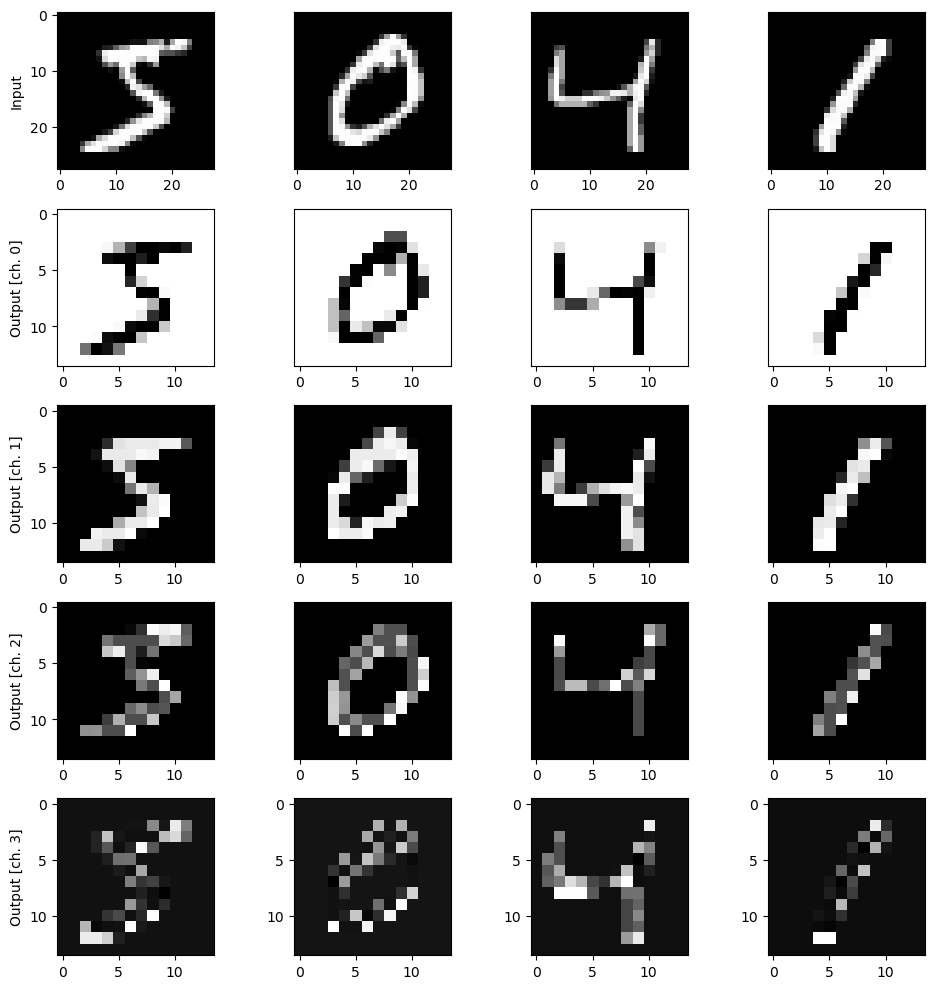

In [19]:
n_samples = 4
n_channels = 4
fig, axes = plt.subplots(1 + n_channels, n_samples, figsize=(10, 10))
for k in range(n_samples):
    axes[0, 0].set_ylabel("Input")
    if k != 0:
        axes[0, k].yaxis.set_visible(False)
    axes[0, k].imshow(train_images[k, :, :, 0], cmap="gray")

    # Plot all output channels
    for c in range(n_channels):
        axes[c + 1, 0].set_ylabel("Output [ch. {}]".format(c))
        if k != 0:
            axes[c, k].yaxis.set_visible(False)
        axes[c + 1, k].imshow(q_train_images[k, :, :, c], cmap="gray")

plt.tight_layout()
plt.show()

Each quantum kernel distorts the original image, but the global shape is preserved

## Hybrid quantum-classical model

The resulting features are fed into a neural network architecture with one fully connected layer. For each input image, it outputs a probabability for each digit, hence the 10 outputs with a softmax activation function. The model is optimized on the accuracy metric, which defines how many predictions are right out of all of them

In [20]:
def ClassifierNN():
    """Initializes and returns a custom Keras model
    which is ready to be trained."""
    model = keras.models.Sequential([
        keras.layers.Flatten(),
        keras.layers.Dense(10, activation="softmax")
        # one fully connected layer with 10 output nodes and softmax activation
    ])

    model.compile(
        optimizer='adam',
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"],
    )
    return model

Extended model with two convolutional layers

In [30]:
def ClassifierCNN():
    model = keras.models.Sequential([
        keras.layers.Conv2D(64, kernel_size=3, activation="relu", input_shape=(28, 28, 1)),
        keras.layers.Conv2D(32, kernel_size=3, activation="relu"),
        keras.layers.Flatten(),
        keras.layers.Dense(10, activation="softmax")
    ])

    model.compile(
        optimizer='adam',
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"],
    )
    return model

In [31]:
def ClassifierQCNN():
    model = keras.models.Sequential([
        keras.layers.Conv2D(64, kernel_size=3, activation="relu", input_shape=(14, 14, 4)),
        keras.layers.Conv2D(32, kernel_size=3, activation="relu"),
        keras.layers.Flatten(),
        keras.layers.Dense(10, activation="softmax")
    ])

    model.compile(
        optimizer='adam',
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"],
    )
    return model

## Model Training

The models are then trained on the quantum pre-processed data and original data for comparison. The following creates the training routine, where we train ``n_runs`` number of models and average the accuracy and loss of those. This is to prevent from receiving performance results from a particularly bad or good model by chance.

In [27]:
from operator import add

def train_model(model_class, train_data, train_labels, val_data, epochs, runs):
    accuracy_histories_summed = [0] * epochs
    loss_histories_summed = [0] * epochs
    for i in range(runs):
        model = model_class()
        print(f"Run {i+1}")
        history = model.fit(
            train_data,
            train_labels,
            validation_data=val_data,
            batch_size=4,
            epochs=epochs,
            verbose=2,
        )
        accuracy_histories_summed = list(map(add, accuracy_histories_summed, history.history["val_accuracy"]))
        loss_histories_summed = list(map(add, loss_histories_summed, history.history["val_loss"]))

    avg_accuracy_history = list(map(lambda x: x/runs, accuracy_histories_summed))
    avg_loss_history = list(map(lambda x: x/runs, loss_histories_summed))
    return model, avg_accuracy_history, avg_loss_history

### Train on Quantum Data

In [ ]:
q_model, q_history_accuracy, q_history_loss = train_model(
    model_class=ClassifierNN,
    train_data=q_train_images, 
    train_labels=train_labels, 
    val_data=(q_test_images, test_labels), 
    epochs=n_epochs, 
    runs=runs)

In [ ]:
qcn_model, qcn_history_acc, qcn_history_loss = train_model(
    model_class=ClassifierQCNN, 
    train_data=q_train_images, 
    train_labels=train_labels, 
    val_data=(q_test_images, test_labels), 
    epochs=n_epochs, 
    runs=runs)

### Train on original data

Model trained on the original data for comparison

In [ ]:
c_model, c_history_acc, c_history_loss = train_model(
    model_class=ClassifierNN, 
    train_data=train_images, 
    train_labels=train_labels, 
    val_data=(test_images, test_labels), 
    epochs=n_epochs, 
    runs=runs)

In [ ]:
ccn_model, ccn_history_acc, ccn_history_loss = train_model(
    model_class=ClassifierCNN, 
    train_data=train_images, 
    train_labels=train_labels, 
    val_data=(test_images, test_labels), 
    epochs=n_epochs, 
    runs=runs)

## Results

We compare the results of both, the quantum and the classical model

C:\Users\Marja\AppData\Local\Temp\ipykernel_11792\3418284085.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


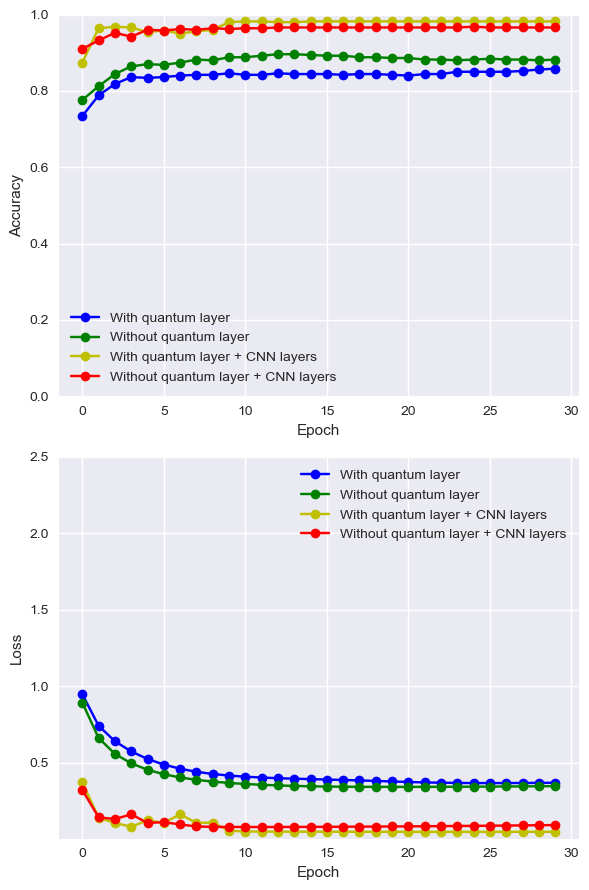

In [35]:
import matplotlib.pyplot as plt

plt.style.use("seaborn")
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 9))

ax1.plot(q_history_accuracy, "-ob", label="With quantum layer")
ax1.plot(c_history_acc, "-og", label="Without quantum layer")
ax1.plot(qcn_history_acc, "-oy", label="With quantum layer + CNN layers")
ax1.plot(ccn_history_acc, "-or", label="Without quantum layer + CNN layers")
ax1.set_ylabel("Accuracy")
ax1.set_ylim([0, 1])
ax1.set_xlabel("Epoch")
ax1.legend()

ax2.plot(q_history_loss, "-ob", label="With quantum layer")
ax2.plot(c_history_loss, "-og", label="Without quantum layer")
ax2.plot(qcn_history_loss, "-oy", label="With quantum layer + CNN layers")
ax2.plot(ccn_history_loss, "-or", label="Without quantum layer + CNN layers")
ax2.set_ylabel("Loss")
ax2.set_ylim(top=2.5)
ax2.set_xlabel("Epoch")
ax2.legend()
plt.tight_layout()
plt.show()

# References

- [Henderson, Maxwell, et al. "Quanvolutional neural networks: powering image recognition with quantum circuits." Quantum Machine Intelligence 2.1 (2020)](https://arxiv.org/abs/1904.04767): paper introducing the QNN
- [Mari, Andrea "Quanvolutional Neural Networks" PennyLane.ai (2020)](https://pennylane.ai/qml/demos/tutorial_quanvolution/#classical-convolution): slightly adapted implementation of the QNN in PennyLane
- [Houssein et al. "Hybrid quantum-classical convolutional neural network model for COVID-19 prediction using chest X-ray images" Journal of Computational Design and Engineering (2022)](https://academic.oup.com/jcde/article/9/2/343/6537164): application of the proposed hybrid model
- [Liu, Junhua, et al. "Hybrid quantum-classical convolutional neural networks." Science China Physics, Mechanics & Astronomy 64.9 (2021)](https://link.springer.com/article/10.1007/s11433-021-1734-3): this proposed QCNN is built similar to the one presented in the paper by Henderson et al., it is tested on another dataset
- [Mitarai, Kosuke, et al. "Quantum circuit learning." Physical Review A 98.3 (2018)](https://journals.aps.org/pra/abstract/10.1103/PhysRevA.98.032309): another application of quantum machine learning, a quantum circuit learns a given task by tuning parameters implemented on it
- [Cong, I., Choi, S. & Lukin, M.D. Quantum convolutional neural networks. Nat. Phys. 15, 1273–1278 (2019)](https://www.nature.com/articles/s41567-019-0648-8#Sec8): another approach of integrating quantum computing and convolutional neural networks, where the whole CNN is approximated by using a quantum circuit
- [Li, YaoChong, et al. "A quantum deep convolutional neural network for image recognition." Quantum Science and Technology 5.4 (2020)](https://iopscience.iop.org/article/10.1088/2058-9565/ab9f93/pdf): another approach of imitating a CNN with a quantum circuit
- [Lecun et al. "Gradient-based learning applied to document recognition" in Proceedings of the IEEE (1998)](https://ieeexplore.ieee.org/abstract/document/726791?casa_token=5JSfq9YtiwMAAAAA:Cq5CgHZw8afNnMo_FCjHYhETpyKrGujFfKAdMw01bGTHwsMLmEt-JMJj-k0e0BdNF0VoKJITxA): one of the first papers to demonstrate the effectiveness of CNNs for image recognition tasks
- [MNIST Dataset](https://git-disl.github.io/GTDLBench/datasets/mnist_datasets/)